# CS1671 Assignment 3 Report
### Jacob Emmerson

Due: 10/20/23

In [83]:
from hw3_skeleton import *

In [84]:
training_file = "data/complex_words_training.txt"
development_file = "data/complex_words_development.txt"
test_file = "data/complex_words_test_unlabeled.txt"

train_data = load_file(training_file)

ngram_counts_file = "ngram_counts.txt.gz"
counts = load_ngram_counts(ngram_counts_file)

---
## Baselines

This section examines the implementation of three baseline classifiers in which we can compare the logistic regression and naive bayes classifer performances.

For our baselines, the following classifiers are implemented:
- **Majority class**: labels every word as complex
- **Word length**: optimizes classification based on word lengths
- **Word Frequency**: optimizes classification for word frequency

### Majority Class

In [85]:
all_complex(training_file)

Precision = 0.43275
Recall = 1.0
F-Score = 0.604083057058105


[0.43275, 1.0, 0.604083057058105]

In [86]:
all_complex(development_file)

Precision = 0.418
Recall = 1.0
F-Score = 0.5895627644569816


[0.418, 1.0, 0.5895627644569816]

### Word Length

Best Threshold Found = 7
--------------------
Training Scores:
Precision = 0.6007401315789473
Recall = 0.8440207972270364
F-Score = 0.7018976699495555

Development Scores:
Precision = 0.6053511705685619
Recall = 0.8660287081339713
F-Score = 0.7125984251968505


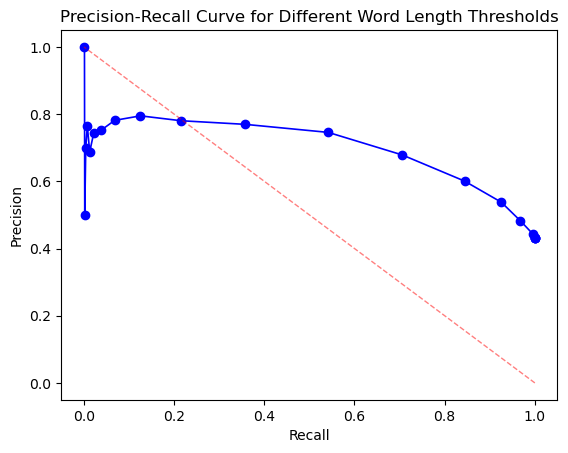

In [87]:
_,_ = word_length_threshold(training_file, development_file)

### Word Frequency

Trying Thresholds between [40, 23688414825]
Best Threshold Found = 19898706.392727856
--------------------
Training Scores:
Precision = 0.5657051282051282
Recall = 0.8157134604274986
F-Score = 0.6680861130825645

Development Scores:
Precision = 0.556782334384858
Recall = 0.8444976076555024
F-Score = 0.6711026615969581


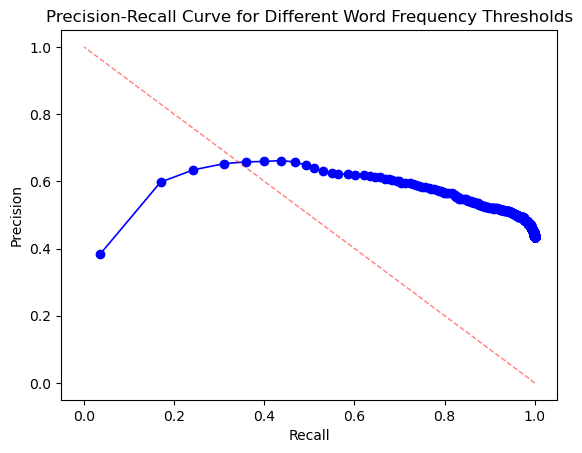

In [88]:
_,_ = word_frequency_threshold(training_file, development_file, counts)

### Comparison of Baselines

$$
\begin{array}{r | c c c}
    & \text{Majority Class} & \text{Word Length} & \text{Word Frequency} \\
    \hline
    \text{Threshold =} & - & 7 & 19898706
\end{array}
$$

**Performance on Training Set:**
$$
\begin{array}{c | c c c}
    \text{Baseline} & \text{Precision} & \text{Recall} & \text{F-Score} \\
    \hline 
    \text{Majority Class} & 0.4326 & 1.0 & 0.6041 \\
    \text{Word Length} & 0.6007 & 0.8440 & 0.7019 \\
    \text{Word Frequency} & 0.5657 & 0.8157 & 0.6681
\end{array}
$$

**Performance on Development Set:**
$$
\begin{array}{c | c c c}
    \text{Baseline} & \text{Precision} & \text{Recall} & \text{F-Score} \\
    \hline 
    \text{Majority Class} & 0.4180 & 1.0 & 0.5896 \\
    \text{Word Length} & 0.6054 & 0.8660 & 0.7126 \\
    \text{Word Frequency} & 0.5568 & 0.8445 & 0.6711
\end{array}
$$

Between the baseline classifiers that utlize word length and word frequency, the word length baseline performs better on average. Intuitively, even without seeing the results, I would guess that a word length classifier would perform better on average. Longer words are bound to be more complex due to the increased number of characters. Though counter examples could be provided for both sides as to whether word length or word frequency results in a more complex word, ultimately these act more as proxies for how complex a word truly is. (Crux may be a complex word, but it is only a length of 4. Rainbow may also be an infrequent word, but it is by no means an unknown or complex word)

---
## Classifiers

Now that the baselines are implemented, we shall implement two classifiers which utilize both word length and frequency as features. Higher order features (e.g. $w_{length}^2$) are not explored.

The following were implemented:
- **Naive Bayes**: uses a continuous implementation of Naive Bayes (Gaussian) where the variance smoothing parameter, $\epsilon$, is optimized. Data is standardized for this task.
- **Logistic Regression**: uses L2 (Ridge) regularization when fitting the model where regularization strength, C, is optimized. Due to the use of regularization, the data is standardized.

### Naive Bayes

Best Smoother Found = 1.2328467394420661
--------------------

Training Scores:
Precision = 0.6017298187808896
Recall = 0.8440207972270364
F-Score = 0.7025727338302477

Development Scores:
Precision = 0.6063651591289783
Recall = 0.8660287081339713
F-Score = 0.7133004926108374


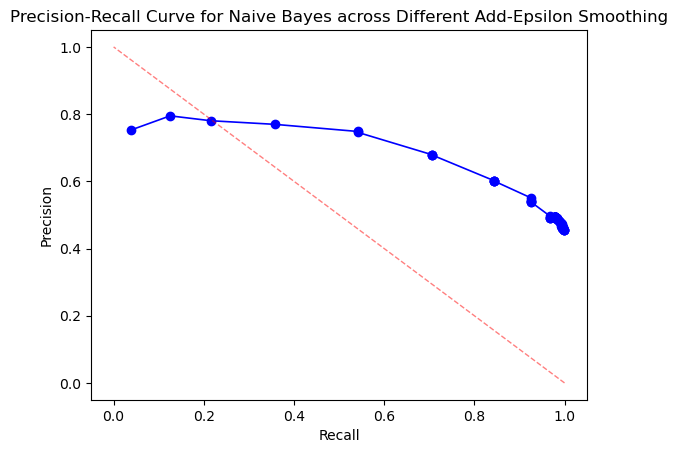

In [89]:
_, nb_wrong, nb_model = naive_bayes(training_file, development_file, counts)

### Logistic Regression

Best C (regularization strength) Found = 0.20565123083486514
--------------------
coefficients for (length, freq) = [[ 1.12554556 -3.33484951]]

Training Scores:
Precision = 0.7264091196960102
Recall = 0.6626227614095899
F-Score = 0.6930513595166162

Development Scores:
Precision = 0.7231920199501247
Recall = 0.69377990430622
F-Score = 0.7081807081807082


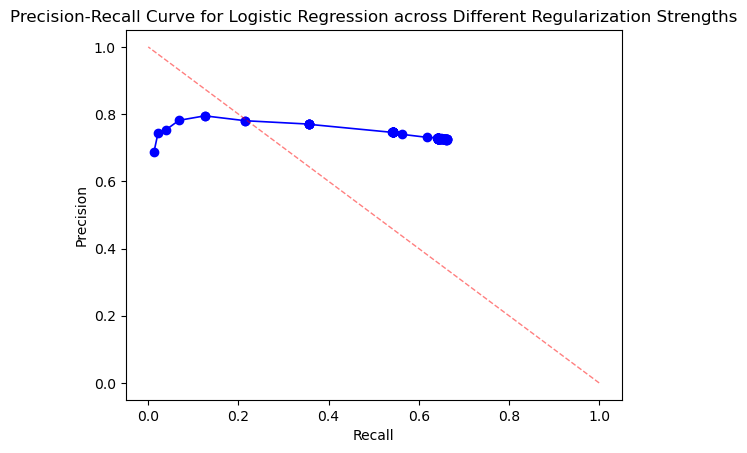

In [90]:
_, lr_wrong, lr_model = logistic_regression(training_file, development_file, counts)

### Comparison of Naive Bayes and Logistic Regression

$$
\begin{array}{r | c c }
    \text{Parameter} & \text{Naive Bayes} & \text{Logistic Regression} \\
    \hline
    \text{Variance Smoothing } (\epsilon) = & 1.233 & - \\
    \text{Regularization Strength (C) =} & - & 0.2057
\end{array}
$$

**Performance on Training Set:**
$$
\begin{array}{r | c c c}
    \text{Baseline} & \text{Precision} & \text{Recall} & \text{F-Score} \\
    \hline 
    \text{Naive Bayes} & 0.6017 & \mathbf{0.8440} & \mathbf{0.7026} \\
    \text{Logistic Regression} & \mathbf{0.7264} & 0.6626 & 0.6931 \\
\end{array}
$$

**Performance on Development Set:**
$$
\begin{array}{r | c c c}
    \text{Baseline} & \text{Precision} & \text{Recall} & \text{F-Score} \\
    \hline 
    \text{Naive Bayes} & 0.6064 & \mathbf{0.8660} & \mathbf{0.7133} \\
    \text{Logistic Regression} & \mathbf{0.7232} & 0.6938 & 0.7082 \\
\end{array}
$$

Though both the Naive Bayes and Logistic Regression models were trained on the same training data, they each had different performances. In particular, Logistic Regression tends to have a better precision which means it tends to be better at correct in its prediction of complex words. However, Naive Bayes tends to correctly classify the complex words, meaning it has a better recall. To elaborate on what these metrics mean for the models, when Logistic Regression classifies a word as complex, it is more likely to be a truely complex word than it is with Naive Bayes. Naive Bayes tends to classify more words of the complex class correctly (> Recall = 86%), but due to its low precision it is classifying non-complex words as complex. For an easier display of precision vs. recall, we can take a look at the majority class baseline (see the baseline section). It has a recall = 1, which is expected since even though there are non-complex words being predicted incorrectly, all the words in the complex class will be predicted correctly as complex.

Overall, the models performed very similarly according to their F-Score. Objectively, the **Naive Bayes performed better on average**. However, depending on the task at hand, one may prefer one model over the other. For example, in spam classification, a higher precision would be better than a higher recall since we don't want non-spam emails to be classified as spam.

---
## Test Set Predictions

Since the Naive Bayes performed better on average, it will be used to make the predictions on the test data.

In [91]:
dev_data = load_file(development_file)

In [92]:
all_data = pd.DataFrame({'words' : train_data[0] + dev_data[0], 'class' : train_data[1] + dev_data[1]})
all_data,_ = get_clf_features(all_data, counts = counts)
all_data.head()

,words,class,length,freq
0,string,0,-0.548067,-0.035853
1,derailed,1,0.216962,-0.065662
2,asylum-seekers,0,2.512051,-0.066060
3,shaping,0,-0.165552,-0.056415
4,worked,0,-0.548067,0.039501


In [93]:
x_M = all_data[['length', 'freq']].to_numpy()
y_M = all_data['class'].to_numpy()

In [94]:
test_X = pd.read_csv(test_file, sep = '\t').rename(columns = {'WORD' : 'words'})[['words']]
test_X,_ = get_clf_features(test_X, counts = counts)
test_X.head()

,words,length,freq
0,threads,-0.120891,-0.356532
1,reinforce,0.678116,-0.360099
2,letters,-0.120891,0.559965
3,pioneered,0.678116,-0.428191
4,closer,-0.520394,-0.010127


In [95]:
t_X = test_X[['length','freq']].to_numpy()

In [96]:
nb_model.fit(x_M, y_M)
test_X['y_pred'] = nb_model.predict(t_X)
test_X.head()

,words,length,freq,y_pred
0,threads,-0.120891,-0.356532,1
1,reinforce,0.678116,-0.360099,1
2,letters,-0.120891,0.559965,0
3,pioneered,0.678116,-0.428191,1
4,closer,-0.520394,-0.010127,0


Do not change the boolean unless a new csv is needed for the test set predictions

In [97]:
if False:
    test_X = test_X[['words','y_pred']].rename(columns={'words' : 'WORD', 'y_pred' : 'PREDICTION'})
    test_X.to_csv('./predict_4405667.csv', sep = ',', index = False, header = True)

---
## Error Analysis

$$
N = \text{Set of incorrect predictions from NB} \\
L = \text{Set of incorrect predctions from LR} \\
\text{Words correctly predicted by NB but not by LR} = L - N \\
\text{Words correctly predicted by LR but not by NB} = N - L
$$

In [98]:
nb_right_lr_wrong_dev = set(lr_wrong['dev']) - set(nb_wrong['dev'])
nb_wrong_lr_right_dev = set(nb_wrong['dev']) - set(lr_wrong['dev'])

### Predicted correctly by Naive Bayes but not by Logistic Regression

In [99]:
nblr = pd.DataFrame({'word' : list(nb_right_lr_wrong_dev)})
nblr['length'] = [len(w) for w in nblr['word']]
nblr['freq'] = [counts[w] for w in nblr['word']]
nblr.head()

,word,length,freq
0,concept,7,68789840
1,bobsled,7,37366
2,plagued,7,2162088
3,improve,7,36520238
4,clatter,7,1101652


### Predicted correctly by Logistic Regression but not by Naive Bayes

In [100]:
lrnb = pd.DataFrame({'word' : list(nb_wrong_lr_right_dev)})
lrnb['length'] = [len(w) for w in lrnb['word']]
lrnb['freq'] = [counts[w] for w in lrnb['word']]
lrnb.head()

,word,length,freq
0,started,7,79425228
1,question,8,211591046
2,outrage,7,3634284
3,foodies,7,11324
4,harmful,7,7470466


### Analysis

nblr = Correct by NB not by LR

lrnb = Correct by LR not by NB

In [101]:
print(f"{nblr.freq.median() = }")
print(f"{lrnb.freq.median() = }")

nblr.freq.median() = 4674790.0
lrnb.freq.median() = 31806740.0


In [102]:
print(f"{nblr.length.median() = }")
print(f"{lrnb.length.median() = }")

nblr.length.median() = 7.0
lrnb.length.median() = 7.0


On average, according to the median, we can see that the words correctly predicted by naive bayes but not by logistic regression tend to be much shorter in frequency. The length seems to be relatively the same between both datasets. This leads me to believe that the incorrect predictions come primarily from how the classifiers utilize the word frequencies according to the counts data.

In [104]:
print(f"{nblr.shape = }")
print(f"{lrnb.shape = }")

nblr.shape = (72, 3)
lrnb.shape = (123, 3)


In [103]:
print(f"{lr_model.coef_ = }")

lr_model.coef_ = array([[ 1.12554556, -3.33484951]])


We can see that in the regression model, the coefficients are not equal; in fact, the coefficient for the word frequency is negative while being larger in magnitude than word length. This makes sense since words with larger frequencies are thought to be more complex, and the predicted probability will be lower with more frequent words given the negative coeficient. This negative coefficient is likely why the words correctly predicted by logistic regression and not by Naive Bayes have a much larger average frequency. 